In [1]:
import pandas as pd

In [2]:
headlines = pd.read_csv('Data/headlines.csv')

In [3]:
headlines.shape

(382139, 8)

In [4]:
headlines.head()

,index,Unnamed: 0,url,headline_no_site,site,time,country,bias
0,0,0,https://www.iol.co.za/entertainment/movies-the...,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,1,1,https://www.iol.co.za/entertainment/music/the-...,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,2,2,https://www.iol.co.za/entertainment/celebrity-...,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,3,3,https://www.iol.co.za/news/south-africa/wester...,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,4,4,https://www.iol.co.za/business-report/careers/...,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [5]:
headlines.isnull().sum()

index               0
Unnamed: 0          0
url                 0
headline_no_site    0
site                0
time                0
country             0
bias                0
dtype: int64

In [6]:
headlines.describe()

,index,Unnamed: 0,bias
count,382139.000000,382139.000000,382139.000000
mean,191069.000000,191069.000000,0.171057
std,110314.171596,110314.171596,0.101210
min,0.000000,0.000000,0.000000
25%,95534.500000,95534.500000,0.166667
50%,191069.000000,191069.000000,0.166667
75%,286603.500000,286603.500000,0.166667
max,382138.000000,382138.000000,1.000000


In [7]:
headlines.drop(['Unnamed: 0', 'url', 'index'], axis=1, inplace=True)
headlines.head()

,headline_no_site,site,time,country,bias
0,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [8]:
# Assuming 'headlines' is the name of your dataframe
min_headlines_threshold = 5000
top_sites = headlines['site'].value_counts()
top_sites = top_sites[top_sites >= min_headlines_threshold].index

# Create a new dataframe with only the sites with at least 5000 headlines
headlines_filtered = headlines[headlines['site'].isin(top_sites)].copy()

# Display the value counts for the new dataframe
headlines_filtered['site'].value_counts()


site
dailymail.co.uk        8219
telegraph.co.uk        7596
abcnews.go.com         6305
indiatimes.com         6269
mirror.co.uk           6207
washingtonpost.com     6143
nytimes.com            6032
independent.co.uk      5983
nydailynews.com        5929
express.co.uk          5919
eonline.com            5826
usmagazine.com         5582
metro.co.uk            5538
dnaindia.com           5372
forbes.com             5297
usatoday.com           5239
standard.co.uk         5207
people.com             5125
businessinsider.com    5117
nypost.com             5044
Name: count, dtype: int64

In [9]:
headlines_filtered.head()

,headline_no_site,site,time,country,bias
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.333333
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,2016-01-19 08:00:00+00:00,USA,0.166667
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,2016-02-27 08:00:00+00:00,USA,0.333333
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.166667
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,2016-02-10 08:00:00+00:00,USA,0.166667


In [10]:
headlines_filtered.shape

(117949, 5)

feature engineering

In [11]:
# Assuming 'headlines' is your DataFrame
headlines_filtered['Word_Count'] = headlines_filtered['headline_no_site'].apply(lambda x: len(x.split()))

In [12]:
from textblob import TextBlob

# Assuming 'headlines' is your DataFrame
headlines_filtered['Sentiment_Polarity'] = headlines_filtered['headline_no_site'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [13]:
headlines_filtered['Text_Length'] = headlines_filtered['headline_no_site'].apply(len)

In [14]:
headlines_filtered['Avg_Word_Length'] = headlines_filtered['Text_Length'] / headlines_filtered['Word_Count']

In [15]:
import datetime

In [16]:
# Date Features
headlines_filtered['Day_of_Week'] = pd.to_datetime(headlines_filtered['time']).dt.day_name()
headlines_filtered['Month'] = pd.to_datetime(headlines_filtered['time']).dt.month

In [17]:
# Time feature
headlines_filtered['Hour_of_Day'] = pd.to_datetime(headlines_filtered['time']).dt.hour

In [18]:
headlines_filtered.head()

,headline_no_site,site,time,country,bias,Word_Count,Sentiment_Polarity,Text_Length,Avg_Word_Length,Day_of_Week,Month,Hour_of_Day
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.333333,7,0.0,42,6.000000,Wednesday,2,8
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,2016-01-19 08:00:00+00:00,USA,0.166667,11,0.8,74,6.727273,Tuesday,1,8
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,2016-02-27 08:00:00+00:00,USA,0.333333,12,0.6,66,5.500000,Saturday,2,8
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.166667,12,0.0,70,5.833333,Wednesday,2,8
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,2016-02-10 08:00:00+00:00,USA,0.166667,13,0.0,77,5.923077,Wednesday,2,8


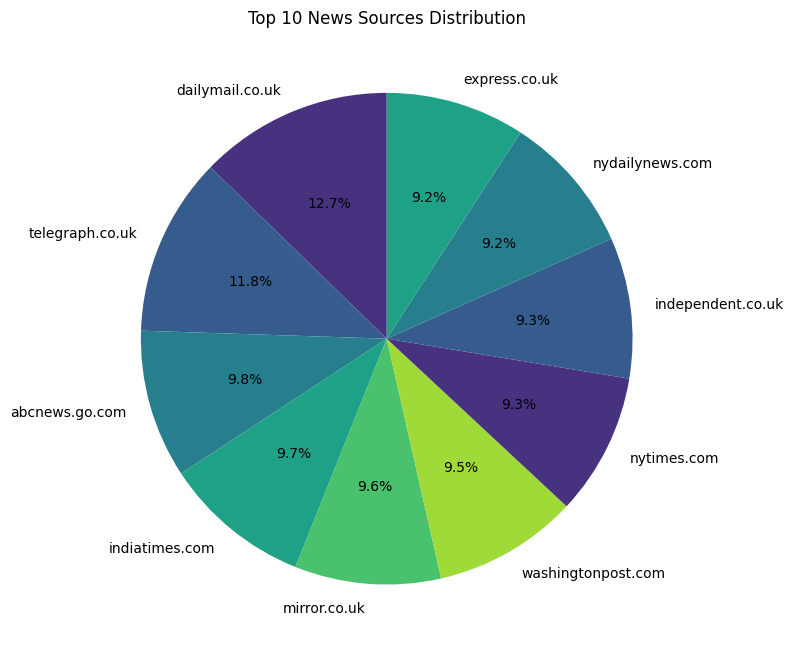

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'headlines_filtered' is the name of your dataframe
top_10_sites = headlines_filtered['site'].value_counts().nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_sites, labels=top_10_sites.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Top 10 News Sources Distribution')
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/xl/6sfvtvk54y1982txcc62tyqw0000gn/T/ipykernel_90925/2630809544.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=headlines_filtered, palette='viridis')


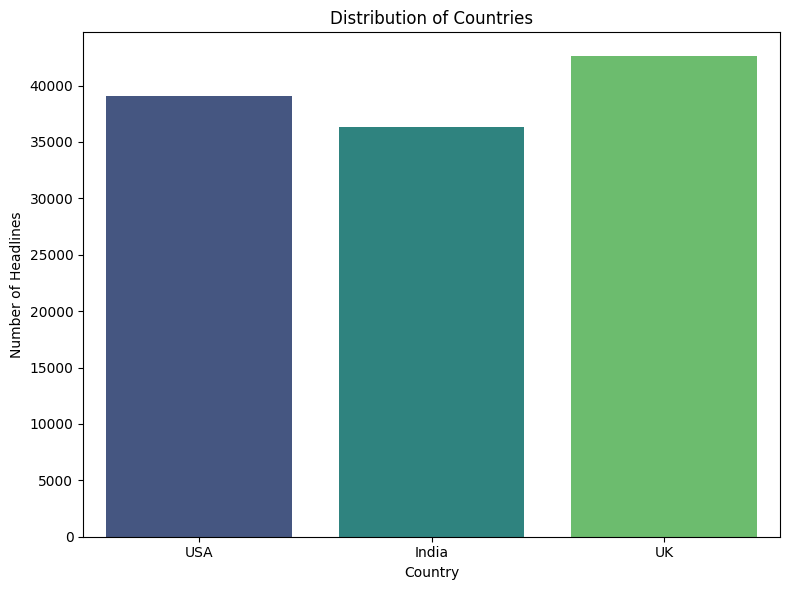

In [20]:
# Assuming 'headlines_filtered' is the name of your dataframe
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=headlines_filtered, palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Number of Headlines')
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Assuming 'time' is the feature containing datetime information
headlines_filtered['time'] = pd.to_datetime(headlines_filtered['time'], errors='coerce')

# Extract the year and create a new feature 'Publication_Year'
headlines_filtered['Publication_Year'] = headlines_filtered['time'].dt.year

In [22]:
headlines_filtered['Publication_Year'].value_counts()

Publication_Year
2018    12016
2019    11985
2017    11900
2016    11855
2020    11834
2015    11692
2014    11069
2013    10153
2012     7887
2021     5855
2011     4745
2010     3024
2009     2197
2008     1222
2007      328
2006      109
2005       78
Name: count, dtype: int64

In [23]:
# Drop the 'time' column
headlines_filtered =headlines_filtered.drop(columns=['time'])

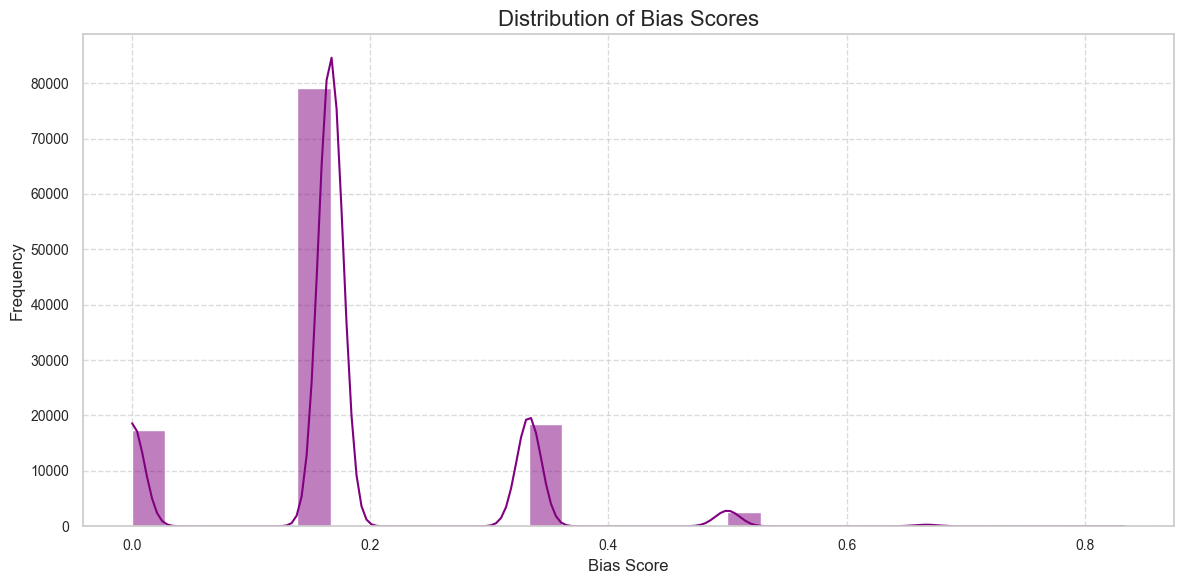

In [24]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of 'bias' scores
plt.figure(figsize=(12, 6))
sns.histplot(headlines_filtered['bias'], bins=30, kde=True, color='purple')

# Style the plot
plt.title('Distribution of Bias Scores', fontsize=16)
plt.xlabel('Bias Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
headlines_filtered['bias'].value_counts()

bias
0.166667    79211
0.333333    18478
0.000000    17353
0.500000     2629
0.666667      262
0.833333       16
Name: count, dtype: int64

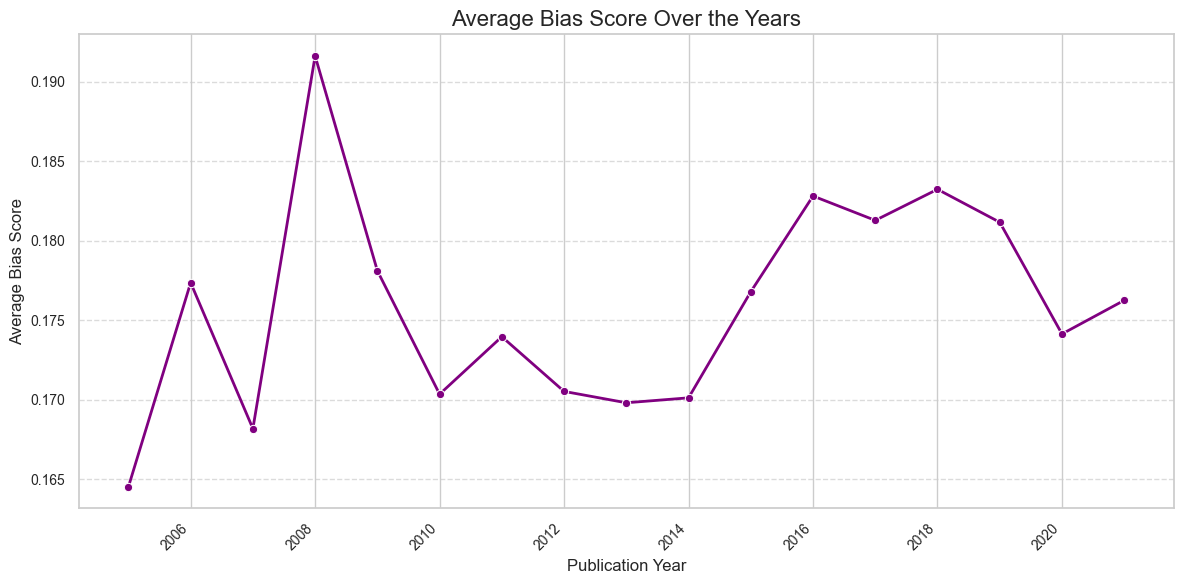

In [26]:
# Assuming 'headlines_filtered' is the name of your dataframe
# Convert 'Publication_Year' column to datetime format if not already
headlines_filtered['Publication_Year'] = pd.to_datetime(headlines_filtered['Publication_Year'], format='%Y')

# Group by year and calculate the average bias score
average_bias_by_year = headlines_filtered.groupby(headlines_filtered['Publication_Year'].dt.year)['bias'].mean().reset_index()

# Set a Seaborn style
sns.set(style="whitegrid")

# Plot the average bias score for each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Publication_Year', y='bias', data=average_bias_by_year, marker='o', color='purple', linewidth=2)

# Style the plot
plt.title('Average Bias Score Over the Years', fontsize=16)
plt.xlabel('Publication Year', fontsize=12)
plt.ylabel('Average Bias Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/xl/6sfvtvk54y1982txcc62tyqw0000gn/T/ipykernel_90925/3152659169.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Word_Count', y='bias', data=headlines_filtered, inner='quartile', palette='Blues')


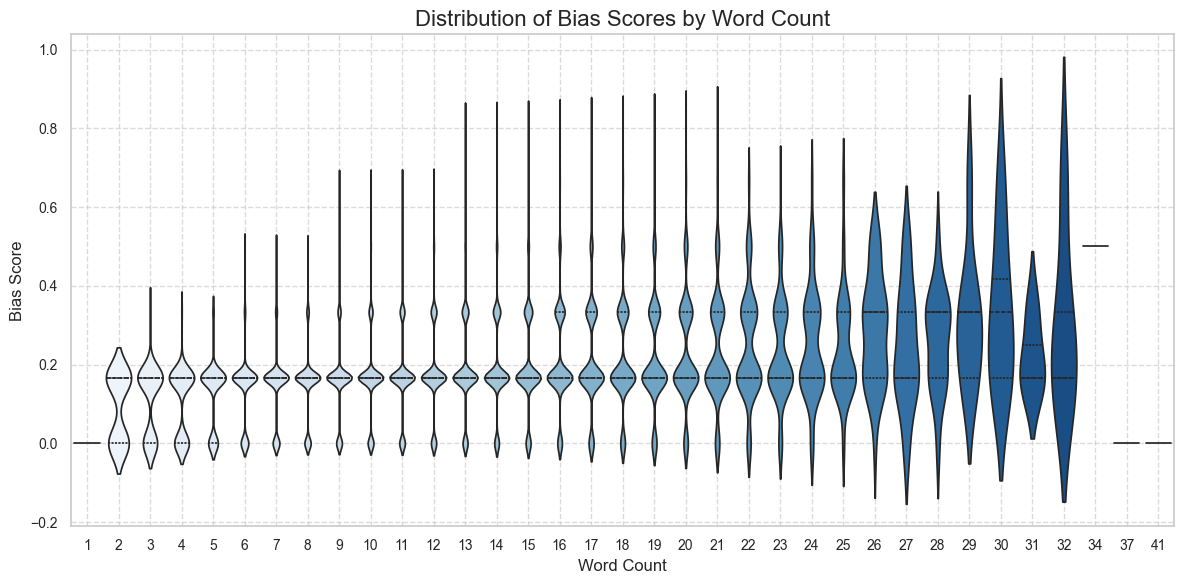

In [27]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot a violin plot of bias scores by average word count
plt.figure(figsize=(12, 6))
sns.violinplot(x='Word_Count', y='bias', data=headlines_filtered, inner='quartile', palette='Blues')

# Style the plot
plt.title('Distribution of Bias Scores by Word Count', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Bias Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [28]:
headlines_filtered.head()

,headline_no_site,site,country,bias,Word_Count,Sentiment_Polarity,Text_Length,Avg_Word_Length,Day_of_Week,Month,Hour_of_Day,Publication_Year
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.333333,7,0.0,42,6.000000,Wednesday,2,8,2016-01-01
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,0.166667,11,0.8,74,6.727273,Tuesday,1,8,2016-01-01
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.333333,12,0.6,66,5.500000,Saturday,2,8,2016-01-01
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,0.166667,12,0.0,70,5.833333,Wednesday,2,8,2016-01-01
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.166667,13,0.0,77,5.923077,Wednesday,2,8,2016-01-01


In [29]:
headlines_filtered['Sentiment_Polarity'].unique()

array([ 0.        ,  0.8       ,  0.6       , ...,  0.10277778,
       -0.05555556,  0.345     ])

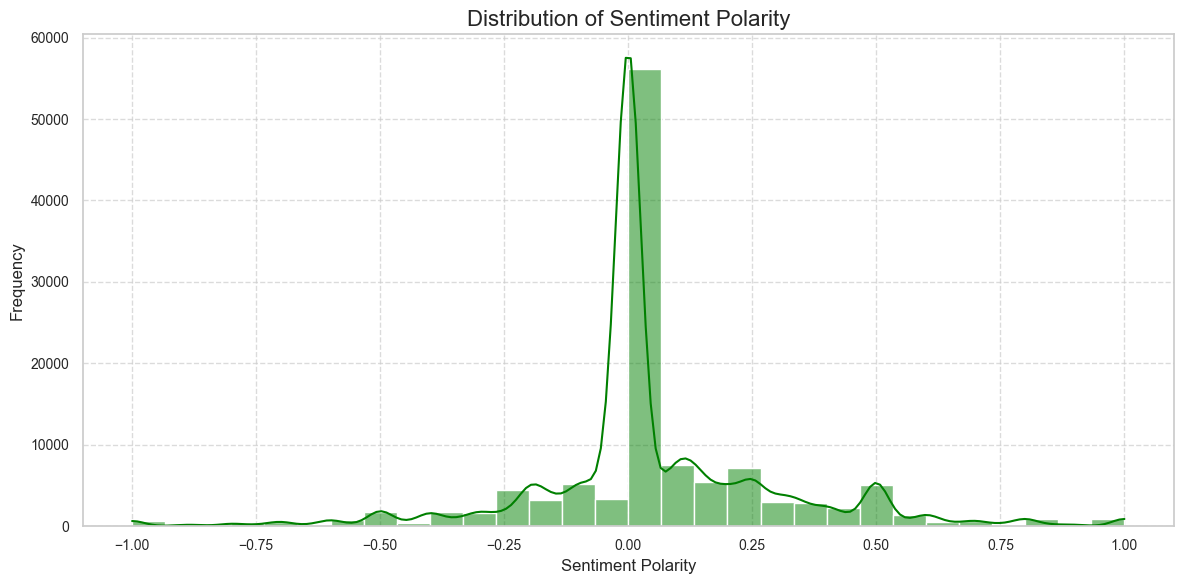

In [30]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot the distribution of 'Sentiment_Polarity'
plt.figure(figsize=(12, 6))
sns.histplot(headlines_filtered['Sentiment_Polarity'], bins=30, kde=True, color='green')

# Style the plot
plt.title('Distribution of Sentiment Polarity', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/xl/6sfvtvk54y1982txcc62tyqw0000gn/T/ipykernel_90925/3237334342.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical')


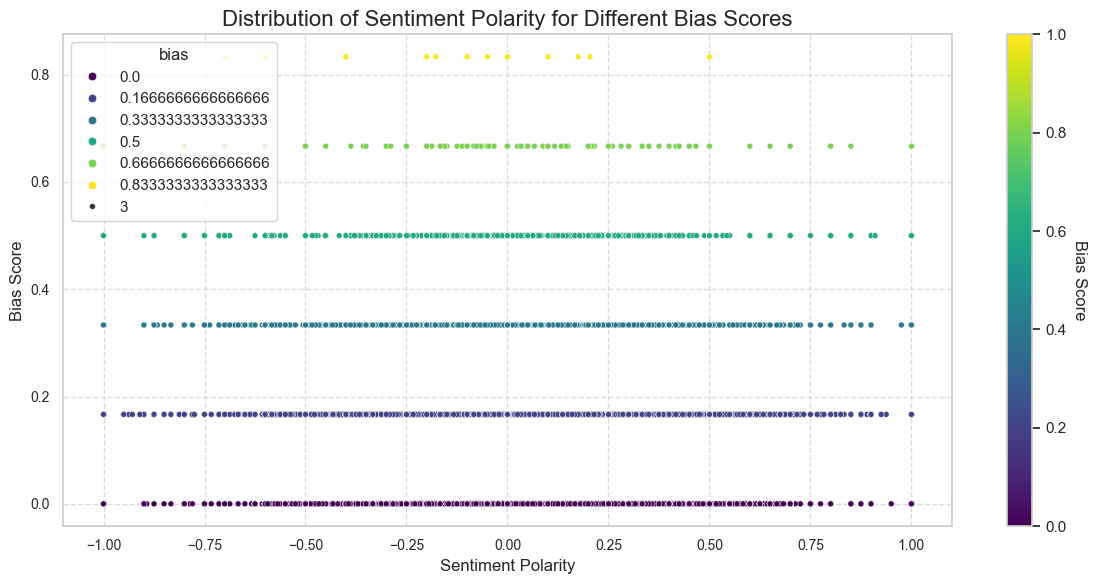

In [31]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot a swarm plot for Sentiment_Polarity vs. bias with a gradient color scheme
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='Sentiment_Polarity', y='bias', data=headlines_filtered, hue='bias', palette='viridis', size=3)

# Style the plot
plt.title('Distribution of Sentiment Polarity for Different Bias Scores', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Bias Score', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Set an empty array

# Add a colorbar for bias scores
cbar = plt.colorbar(sm, orientation='vertical')
cbar.set_label('Bias Score', rotation=270, labelpad=15)

# Show the plot
plt.tight_layout()
plt.show()

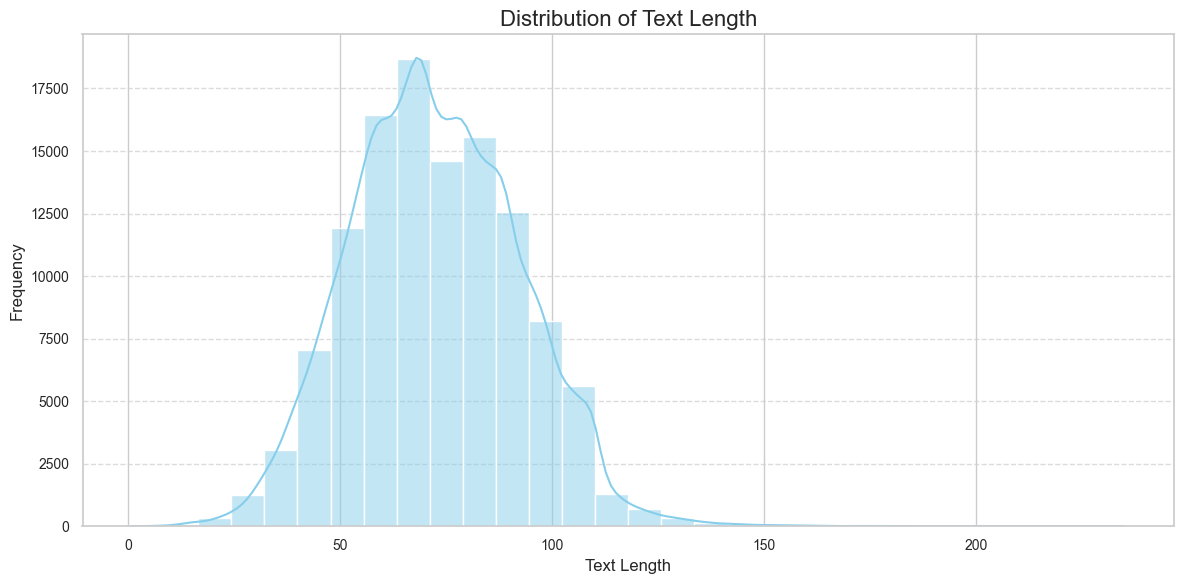

In [32]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot a histogram of Text_Length
plt.figure(figsize=(12, 6))
sns.histplot(x='Text_Length', data=headlines_filtered, bins=30, kde=True, color='skyblue')

# Style the plot
plt.title('Distribution of Text Length', fontsize=16)
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
headlines_filtered.head()

,headline_no_site,site,country,bias,Word_Count,Sentiment_Polarity,Text_Length,Avg_Word_Length,Day_of_Week,Month,Hour_of_Day,Publication_Year
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.333333,7,0.0,42,6.000000,Wednesday,2,8,2016-01-01
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,0.166667,11,0.8,74,6.727273,Tuesday,1,8,2016-01-01
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.333333,12,0.6,66,5.500000,Saturday,2,8,2016-01-01
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,0.166667,12,0.0,70,5.833333,Wednesday,2,8,2016-01-01
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.166667,13,0.0,77,5.923077,Wednesday,2,8,2016-01-01


In [34]:
# Extract the year from the 'Publication_Year' column
headlines_filtered['Publication_Year'] = pd.to_datetime(headlines_filtered['Publication_Year']).dt.year

# Display the updated DataFrame
print(headlines_filtered['Publication_Year'])


9207      2016
9208      2016
9209      2016
9210      2016
9211      2016
          ... 
355081    2021
355082    2021
355083    2021
355084    2021
355085    2021
Name: Publication_Year, Length: 117949, dtype: int32


In [35]:
headlines_filtered.head()

,headline_no_site,site,country,bias,Word_Count,Sentiment_Polarity,Text_Length,Avg_Word_Length,Day_of_Week,Month,Hour_of_Day,Publication_Year
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,USA,0.333333,7,0.0,42,6.000000,Wednesday,2,8,2016
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,USA,0.166667,11,0.8,74,6.727273,Tuesday,1,8,2016
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,USA,0.333333,12,0.6,66,5.500000,Saturday,2,8,2016
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,USA,0.166667,12,0.0,70,5.833333,Wednesday,2,8,2016
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,USA,0.166667,13,0.0,77,5.923077,Wednesday,2,8,2016


In [36]:
headlines_filtered.isnull().sum()

headline_no_site      0
site                  0
country               0
bias                  0
Word_Count            0
Sentiment_Polarity    0
Text_Length           0
Avg_Word_Length       0
Day_of_Week           0
Month                 0
Hour_of_Day           0
Publication_Year      0
dtype: int64

In [38]:
headlines_filtered['Sentiment_Polarity'].value_counts()

Sentiment_Polarity
 0.000000    53204
 0.500000     4681
 0.100000     3847
 0.250000     3582
-0.200000     2940
             ...  
 0.483333        1
-0.248264        1
 0.246667        1
-0.266667        1
 0.345000        1
Name: count, Length: 2803, dtype: int64

get dummies for cat variables: sit, country, day of week, month

standardize all numerical variables
delete rows with negative values

In [39]:
headlines_filtered['bias'].unique()

array([0.33333333, 0.16666667, 0.5       , 0.        , 0.66666667,
       0.83333333])